## [ Indonesian Rice SNPs - Information Content Pre-analysis ]
`Prepared by` <b>Nicholas Dominic, S.Kom., M.T.I.</b>

### Define libraries

In [1]:
from snp_info import load_dataset, SNPinfo
from pandas import read_csv
from numpy import log2
from sklearn.metrics import mutual_info_score as mis
from matplotlib import pyplot as plt
from seaborn import distplot
from warnings import filterwarnings as fw; fw("ignore")

In [2]:
save_path, ext = "./results/", ".png"

### Gene co-expression (all SNPs)

In [3]:
snps = load_dataset()
snps.corr()

,id1000223_T,id1001073_G,id1001973_T,id1002158_T,id1002308_C,id1003036_G,id1003559_T,id1003838_T,id1004109_T,id1004591_G,...,id12008136_G,id12008285_C,id12008328_T,id12008665_T,id12008894_A,id12009153_A,id12009407_C,id12009654_A,id12009820_T,id12010152_T
id1000223_T,1.000000,0.213814,0.138450,0.039201,0.101684,-0.081141,0.227860,0.212633,-0.014032,0.023536,...,0.084106,-0.001705,-0.136974,0.375078,0.203607,-0.018125,0.015553,0.104946,0.173046,-0.170585
id1001073_G,0.213814,1.000000,0.325534,0.399764,-0.119492,-0.183696,-0.161821,-0.239777,0.274572,-0.253823,...,-0.223192,-0.109022,0.219199,-0.121688,-0.232642,-0.018151,-0.071092,-0.266771,-0.113474,0.244835
id1001973_T,0.138450,0.325534,1.000000,0.824565,-0.346137,-0.234277,0.060567,0.071507,0.161289,-0.187252,...,0.098804,-0.135070,0.051473,0.108243,0.040103,0.075768,-0.013962,0.044448,0.045174,0.022047
id1002158_T,0.039201,0.399764,0.824565,1.000000,-0.304522,0.010848,-0.012002,-0.148243,0.299592,-0.227596,...,0.018385,-0.087731,0.122924,0.017586,-0.186104,0.069240,-0.104661,-0.163270,-0.094119,0.082398
id1002308_C,0.101684,-0.119492,-0.346137,-0.304522,1.000000,0.419449,0.188837,0.160258,0.077974,-0.163096,...,0.041922,0.058337,-0.150585,0.152978,0.249867,-0.097667,-0.094462,0.185969,0.222126,0.069089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id12009153_A,-0.018125,-0.018151,0.075768,0.069240,-0.097667,-0.067207,0.245860,0.121029,-0.027030,-0.073895,...,-0.042787,0.147546,-0.031327,0.012905,-0.031740,1.000000,0.294846,0.042672,-0.087167,0.074304
id12009407_C,0.015553,-0.071092,-0.013962,-0.104661,-0.094462,-0.070103,0.072771,0.136017,-0.123088,0.068672,...,-0.003566,0.165777,-0.033518,0.036851,-0.022705,0.294846,1.000000,0.058424,-0.063368,0.015897
id12009654_A,0.104946,-0.266771,0.044448,-0.163270,0.185969,-0.047543,0.159464,0.487133,-0.134730,-0.058994,...,0.348439,-0.068737,-0.139761,0.288753,0.727638,0.042672,0.058424,1.000000,0.442469,-0.126307
id12009820_T,0.173046,-0.113474,0.045174,-0.094119,0.222126,0.153191,0.270400,0.331975,-0.079827,-0.213065,...,0.367859,-0.188495,-0.128566,0.243271,0.571623,-0.087167,-0.063368,0.442469,1.000000,-0.283328


In [4]:
si = SNPinfo(snps=snps)
si

### Entropy

Properties of entropy:
* Non negativity: H(X) ≥ 0, entropy is always non-negative. H(X) = 0 iff X is deterministic.

In [5]:
# Maximum entropy value, i.e., log2(n), where n = number of class
# Formally, it can be written as H(n) <= log2(|n|)
# In the rice SNPs, we have 3 classes (0, 1, 2) and therefore its entropy values range between 0 to log2(3)
max_entropy_val = log2(len(set(snps.id1000223_T)))
max_entropy_val

1.584962500721156

In [6]:
entropy_each_snp = {i : si.entropy(snps[i]) for i in snps.columns}

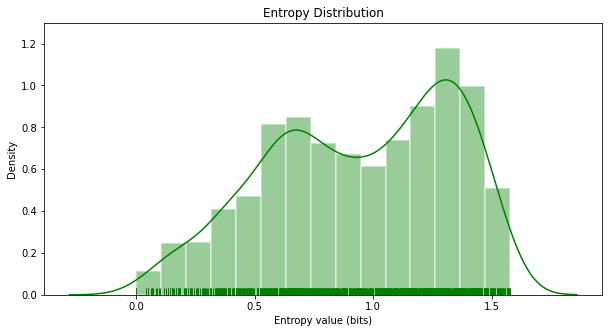

In [7]:
plt.figure(figsize=(10, 5))
plt.title("Entropy Distribution")
plt.xlabel("Entropy value (bits)")
distplot(list(entropy_each_snp.values()), bins=15, color='g', rug=True, hist_kws=dict(edgecolor="white", linewidth=2))
plt.show()

# To save this figure:
# plt.savefig(fname=save_path + "preanalysis/entropy-dist" + ext, dpi=500, bbox_inches='tight')

### Joint Entropy

In [8]:
joint_entropy = si.entropy(snps.T.values, joint=True) # shape of prob. list = (1232, 3)
joint_entropy

11.211384176533803

In [9]:
max_joint_entropy = log2(len(snps.columns)*3)
max_joint_entropy

11.851749041416058

### Total Correlation

* The total correlation is the amount of information shared among the variables in the set.

In [10]:
entropy_each_snp = [si.entropy(snps[i]) for i in snps.columns]

In [11]:
total_correlation = round(sum(entropy_each_snp) - joint_entropy, 5)
total_correlation

1152.5329

In [12]:
max_total_correlation = sum(entropy_each_snp) - max(entropy_each_snp)
max_total_correlation

1162.1660203040674

### Mutual Information (MI)
* Note: Positive Pointwise MI (PPMI) = max(MI, 0) is unnecessary, since there is no MI with negative value.

In [13]:
mutual_info = [round(mis(snps[i], snps[snps.columns[len(snps.columns)-1]]), 5) for i in snps.columns]
# for i in snps.columns:
#     print("{}: {:.5f}".format(i, mis(snps[i], snps[snps.columns[len(snps.columns)-1]])))

### Estimation of Combined Information of Multiple SNPs
* The greater the number of SNPs, the greater the gap between lower_bound_mi and upper_bound_mi

In [14]:
lower_bound_mi, upper_bound_mi = joint_entropy+max(mutual_info), joint_entropy+round(sum(mutual_info), 5)
lower_bound_mi, upper_bound_mi

(11.950604176533803, 58.843904176533805)

In [15]:
round(sum(entropy_each_snp) - lower_bound_mi, 5)

1151.79368

In [16]:
round(sum(entropy_each_snp) - upper_bound_mi, 5)

1104.90038

### Summary

In [17]:
file_name = "preanalysis/snps_combined_information.csv"

In [18]:
snp_info = read_csv("./results/" + file_name)
snp_info

,joint_entropy_,total_corr_,est_total_corr_lower,est_total_corr_upper
0,0.00940,1.30380,0.39356,0.39356
1,0.01899,2.83989,1.76851,1.68629
2,0.02844,4.21156,3.25425,3.07878
3,0.03797,5.66875,4.65209,3.99497
4,0.04715,6.71345,5.98296,5.71856
...,...,...,...,...
1227,11.17541,1149.31078,1149.13621,1121.86932
1228,11.18397,1149.58562,1149.38919,1126.52046
1229,11.19301,1150.44745,1149.84380,1063.53509
1230,11.20219,1151.47562,1150.75658,1072.09384


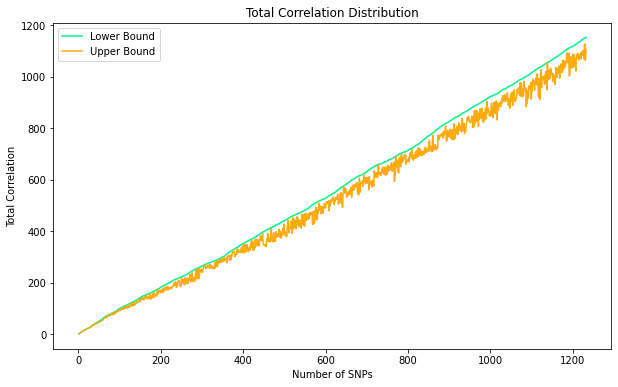

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(snps.columns)+1), snp_info.est_total_corr_lower, label="Lower Bound", color="xkcd:turquoise green")
plt.plot(range(1, len(snps.columns)+1), snp_info.est_total_corr_upper, label="Upper Bound", color="xkcd:yellowish orange")
plt.title("Total Correlation Distribution")
plt.xlabel("Number of SNPs")
plt.ylabel("Total Correlation")
plt.legend()
plt.show()

# To save this figure:
# plt.savefig(fname=save_path + "preanalysis/total-corr-dist" + ext, dpi=500, bbox_inches='tight')

### Copyright 2022 Authors
* Do <b>NOT</b> use or redistribute this file <b>EXCEPT</b> there is an official permission from authors.
* Please cite our paper whenever you take references from this research.
* Any questions can be addressed to `nicholas.dominic@binus.ac.id` or `bdsrc@binus.edu`.

Bioinformatics and Data Science Research Center [(visit page)](https://research.binus.ac.id/bdsrc/)
<br>NVIDIA - BINUS Artificial Intelligence Research and Development Center [(visit page)](https://research.binus.ac.id/airdc/)
<br><b>BINUS Higher Education</b>, part of BINUS Group [(visit page)](https://www.binus.edu/) [(visit QS page)](https://www.topuniversities.com/universities/bina-nusantara-university-binus)